# Zad 01 - `Zadanie_SVD`

**Temat:** Analiza macierzowa. Podstawowe pojęcia. Rozkład SVD

 ## **Treść zadania**

Zadanie dotyczy kompresji obrazu metodą SVD zgodnie z wariantem zadania. Jaka powinna być użyta liczba wartości singularnych żeby zachować 90% informacji na obrazie.

**Wariant zadania: `14`**

![14.webp](../common_files/14.webp)

### Kod Python

Liczba wartości singularnych dla 90% informacji na obrazie: 122821


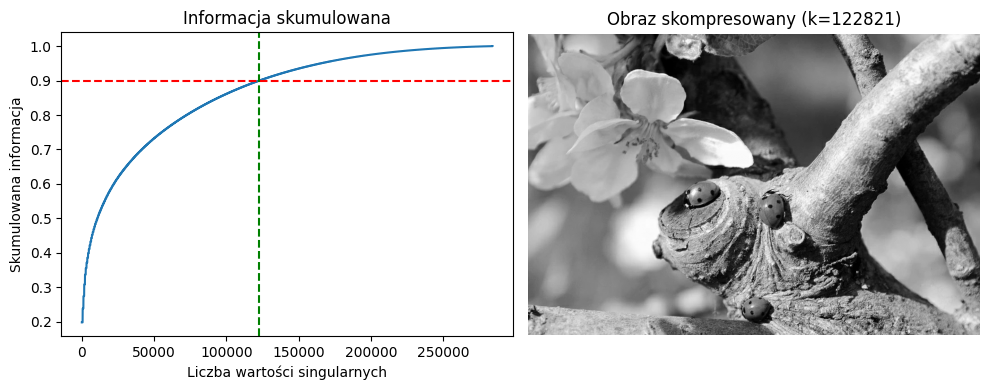

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

INPUT_IMAGE_PATH = "../common_files/14.webp"
OUTPUT_IMAGE_PATH = "14-compressed.webp"

# 1. Wczytanie obrazu
image = Image.open(INPUT_IMAGE_PATH).convert('L')
image_array = np.array(image, dtype=float)

# 2. Rozkład SVD
U, S, Vt = np.linalg.svd(image_array, full_matrices=False)

# 3. Informacja na obrazie
information = np.diag(S)
total_information = np.sum(information)
cumulative_information = np.cumsum(information)

# 4. Znalezienie k dla 90% informacji na obrazie
k = np.argmax(cumulative_information >= 0.9 * total_information) + 1

print(f"Liczba wartości singularnych dla 90% informacji na obrazie: {k}")

# 5. Rekonstrukcja obrazu z k wartościami
U_k = U[:, :k]
S_k = np.diag(S[:k])
Vt_k = Vt[:k, :]
image_compressed = U_k @ S_k @ Vt_k

# 6. Wykres skumulowanej informacji
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(cumulative_information / total_information)
plt.axhline(y=0.9, color='r', linestyle='--')
plt.axvline(x=float(k), color='g', linestyle='--')
plt.xlabel('Liczba wartości singularnych')
plt.ylabel('Skumulowana informacja')
plt.title('Informacja skumulowana')

# 7. Wyświetlenie obrazu po kompresji
plt.subplot(1, 2, 2)
plt.imshow(image_compressed, cmap='gray')
plt.title(f'Obraz skompresowany (k={k})')
plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:

# 9. Zapis wyników
Image.fromarray(image_compressed).save(OUTPUT_IMAGE_PATH)
print(f"\nObraz skompresowany zapisany jako '{OUTPUT_IMAGE_PATH}'")


Obraz skompresowany zapisany jako '14-compressed.webp'
